# **RESUME SCREENING**

---


**Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import re
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from scipy.sparse import hstack
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV


**Connecting with Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/resume/jd_data_designation.csv')
df.head(5)

,Unnamed: 0,industry,job_designation,job_description,responsibilities,requirements_skills,url_links
0,0,Accounting,Billing Manager job description,We are looking for a Billing Manager to join o...,Oversee the preparation of statements and bill...,Proven work experience as a Billing Manager or...,https://resources.workable.com/billing-manager...
1,1,Accounting,Accounts Payable Specialist job description,We are looking for an Accounts Payable Special...,Charge expenses to accounts and cost centers a...,Proven work experience as an Accounts Payable ...,https://resources.workable.com/accounts-payabl...
2,2,Accounting,Medical Biller job description,We are looking for a Medical Biller to join ou...,Generate revenue by making payment arrangement...,Proven work experience as a Medical Biller or ...,https://resources.workable.com/medical-biller-...
3,3,Accounting,Cost analyst job description,We are looking for a cost analyst to help us a...,Gather and analyze financial data\nDetermine s...,"Proven experience as a cost analyst, cost spec...",https://resources.workable.com/cost-analyst-jo...
4,4,Accounting,Payroll Accountant job description,We are looking for an experienced payroll acco...,Oversee employee paychecks\nCalculate net sala...,Previous experience as a payroll accountant or...,https://resources.workable.com/payroll-account...


# **Data Information**

In [ ]:
df.shape

(1029, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1029 non-null   int64 
 1   industry             1029 non-null   object
 2   job_designation      1029 non-null   object
 3   job_description      1029 non-null   object
 4   responsibilities     1029 non-null   object
 5   requirements_skills  1029 non-null   object
 6   url_links            1029 non-null   object
dtypes: int64(1), object(6)
memory usage: 56.4+ KB


**Deleting Unwanted Columns**

In [ ]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

,industry,job_designation,job_description,responsibilities,requirements_skills,url_links
0,Accounting,Billing Manager job description,We are looking for a Billing Manager to join o...,Oversee the preparation of statements and bill...,Proven work experience as a Billing Manager or...,https://resources.workable.com/billing-manager...
1,Accounting,Accounts Payable Specialist job description,We are looking for an Accounts Payable Special...,Charge expenses to accounts and cost centers a...,Proven work experience as an Accounts Payable ...,https://resources.workable.com/accounts-payabl...
2,Accounting,Medical Biller job description,We are looking for a Medical Biller to join ou...,Generate revenue by making payment arrangement...,Proven work experience as a Medical Biller or ...,https://resources.workable.com/medical-biller-...
3,Accounting,Cost analyst job description,We are looking for a cost analyst to help us a...,Gather and analyze financial data\nDetermine s...,"Proven experience as a cost analyst, cost spec...",https://resources.workable.com/cost-analyst-jo...
4,Accounting,Payroll Accountant job description,We are looking for an experienced payroll acco...,Oversee employee paychecks\nCalculate net sala...,Previous experience as a payroll accountant or...,https://resources.workable.com/payroll-account...


In [ ]:
df.isnull().sum()

industry               0
job_designation        0
job_description        0
responsibilities       0
requirements_skills    0
url_links              0
dtype: int64

**Categories**

In [ ]:
industries = df['industry'].tolist()
categories = []
m=0
for i in industries:
  if i not in categories:
    categories.append(i)
    print(m, i)
    m+=1

0 Accounting
1 Finance
2 Administrative
3 IT and Development
4 Design
5 Customer service
6 Educator & Education
7 Corporate training
8 Engineering
9 Construction
10 Production
11 Healthcare
12 Pharmaceuticals
13 Hospitality
14 Travel & Tourism
15 Human Resources (HR)
16 Law enforcement / Security
17 Legal
18 Logistics
19 Facilities
20 Marketing
21 Public Relations (PR)
22 Media
23 Real estate
24 Sales
25 Retail


In [ ]:
category = df['industry'].value_counts().reset_index()
category

,index,industry
0,Healthcare,120
1,Administrative,97
2,IT and Development,89
3,Human Resources (HR),85
4,Marketing,68
5,Hospitality,58
6,Sales,57
7,Customer service,53
8,Accounting,43
9,Educator & Education,37


**Visualizating Target Class**

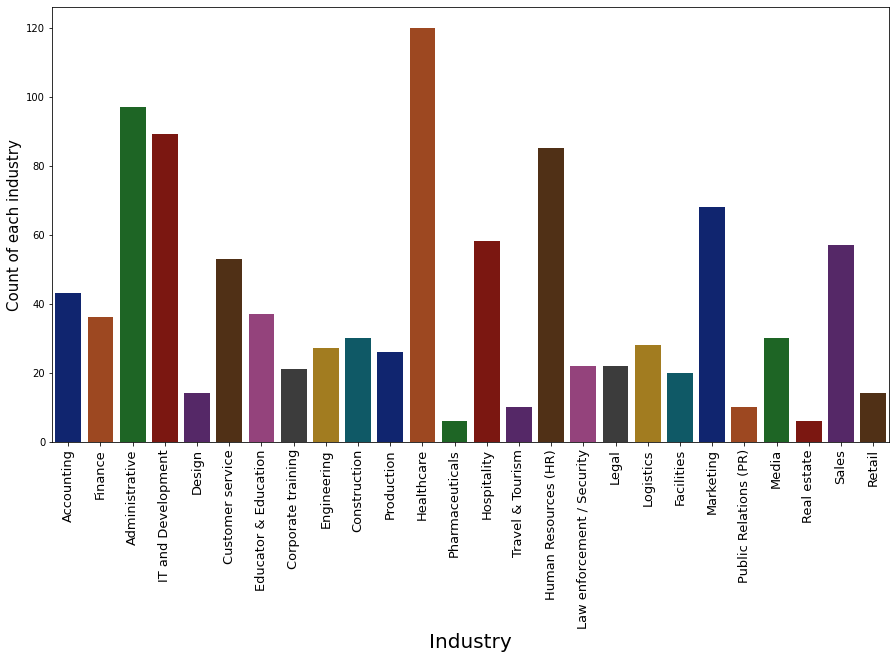

In [ ]:
plt.figure(figsize=(15,8))
countplot = sns.countplot(x='industry', palette='dark',data=df)
plt.ylabel("Count of each industry", size = 15)
plt.xlabel("Industry", size = 20)
countplot.set_xticklabels(countplot.get_xticklabels(), rotation=90, size = 13)
plt.show()

**Class Imbalance**

In [ ]:
no_sample = max(df['industry'].value_counts())

balanced_df=df.groupby(
    "industry",
    as_index=False,
    group_keys=False
  ).apply(
    lambda s: s.sample(no_sample,replace=True)
)
balanced_df.shape

(3120, 6)

In [ ]:
df = balanced_df

In [ ]:
df['industry'].value_counts()

Accounting                    120
Administrative                120
Sales                         120
Retail                        120
Real estate                   120
Public Relations (PR)         120
Production                    120
Pharmaceuticals               120
Media                         120
Marketing                     120
Logistics                     120
Legal                         120
Law enforcement / Security    120
IT and Development            120
Human Resources (HR)          120
Hospitality                   120
Healthcare                    120
Finance                       120
Facilities                    120
Engineering                   120
Educator & Education          120
Design                        120
Customer service              120
Corporate training            120
Construction                  120
Travel & Tourism              120
Name: industry, dtype: int64

# **Text Preprocessing**

**Downloading Nltk Tools**

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def cleanResume(resumeText):
    resumeText = re.sub('\r\n', ' ', resumeText)
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~"""), ' ', resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)
    resumeText = resumeText.replace('job description','')
    resumeText = resumeText.lower()
    tokens = nltk.word_tokenize(resumeText)
    filtered_text = [word for word in tokens if not word in stop_words]
    return ' '.join(filtered_text)


In [ ]:
df["resume"] = df[['industry', 'job_designation','job_description','responsibilities', 'requirements_skills']].astype(object).apply(" ".join, axis=1)

In [ ]:
df['processed_data'] = df['resume'].apply(lambda x:cleanResume(x))
df.head()

,industry,job_designation,job_description,responsibilities,requirements_skills,url_links,resume,processed_data
23,Accounting,Accounting Supervisor job description,We are looking for an Accounting Supervisor to...,"Oversee daily transactions, including accounts...",Proven work experience as an Accounting Superv...,https://resources.workable.com/accounting-supe...,Accounting Accounting Supervisor job descripti...,accounting accounting supervisor looking accou...
15,Accounting,Collection Specialist job description,We are looking for a competent Collection Spec...,Monitor accounts to identify outstanding debts...,Proven experience as a Collection Specialist o...,https://resources.workable.com/collection-spec...,Accounting Collection Specialist job descripti...,accounting collection specialist looking compe...
17,Accounting,Forensic Accountant job description,We are looking for a Forensic Accountant to au...,Review financial documents to identify inaccur...,Proven work experience as a Forensic Accountan...,https://resources.workable.com/forensic-accoun...,Accounting Forensic Accountant job description...,accounting forensic accountant looking forensi...
33,Accounting,Credit Analyst job description,We are looking for a professional Credit Analy...,Assess creditworthiness of existing or prospec...,Proven working experience as a credit analyst\...,https://resources.workable.com/credit-analyst-...,Accounting Credit Analyst job description We a...,accounting credit analyst looking professional...
30,Accounting,Tax Manager job description,We are looking for an experienced Tax Manager ...,Deliver a full range of tax services in compli...,Proven work experience as a Tax Manager\nExcel...,https://resources.workable.com/tax-manager-job...,Accounting Tax Manager job description We are ...,accounting tax manager looking experienced tax...


In [ ]:
label = LabelEncoder()
df['target'] = label.fit_transform(df['industry'])
df.head()

,industry,job_designation,job_description,responsibilities,requirements_skills,url_links,resume,processed_data,target
23,Accounting,Accounting Supervisor job description,We are looking for an Accounting Supervisor to...,"Oversee daily transactions, including accounts...",Proven work experience as an Accounting Superv...,https://resources.workable.com/accounting-supe...,Accounting Accounting Supervisor job descripti...,accounting accounting supervisor looking accou...,0
15,Accounting,Collection Specialist job description,We are looking for a competent Collection Spec...,Monitor accounts to identify outstanding debts...,Proven experience as a Collection Specialist o...,https://resources.workable.com/collection-spec...,Accounting Collection Specialist job descripti...,accounting collection specialist looking compe...,0
17,Accounting,Forensic Accountant job description,We are looking for a Forensic Accountant to au...,Review financial documents to identify inaccur...,Proven work experience as a Forensic Accountan...,https://resources.workable.com/forensic-accoun...,Accounting Forensic Accountant job description...,accounting forensic accountant looking forensi...,0
33,Accounting,Credit Analyst job description,We are looking for a professional Credit Analy...,Assess creditworthiness of existing or prospec...,Proven working experience as a credit analyst\...,https://resources.workable.com/credit-analyst-...,Accounting Credit Analyst job description We a...,accounting credit analyst looking professional...,0
30,Accounting,Tax Manager job description,We are looking for an experienced Tax Manager ...,Deliver a full range of tax services in compli...,Proven work experience as a Tax Manager\nExcel...,https://resources.workable.com/tax-manager-job...,Accounting Tax Manager job description We are ...,accounting tax manager looking experienced tax...,0


In [ ]:
df['target'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

**Feature Engineering**

In [ ]:
vectorizer = CountVectorizer()
text = vectorizer.fit_transform(df.processed_data).toarray()

In [ ]:
text.shape

(3120, 7350)

**Train Test Spliting**

In [ ]:
X = text
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# **Model Building**

In [ ]:
models = {}

**Logistic Regression**

In [ ]:
lrmodel = LogisticRegression(max_iter=1000)

lrmodel.fit(X_train, y_train)

y_pred = lrmodel.predict(X_test)

acc = accuracy_score(y_test, y_pred)

models['Logistic Regression'] = round(acc*100, 2)
print("\nAccuracy Score:" , acc)


Accuracy Score: 0.9807692307692307


**KNN Classifier**

In [ ]:
knnmodel = KNeighborsClassifier()

knnmodel.fit(X_train, y_train)

y_pred = knnmodel.predict(X_test)

acc = accuracy_score(y_test, y_pred)

models['KNN Classifier'] = round(acc*100, 2)

print("Accuracy Score:" , acc)

Accuracy Score: 0.8894230769230769



**Linear Support Vector Classifier**

In [ ]:
svcmodel = LinearSVC(random_state=20)

svcmodel.fit(X_train, y_train)

y_pred = svcmodel.predict(X_test)

acc = accuracy_score(y_test, y_pred)

models['LinearSupportVector Classifier'] = round(acc*100, 2)

print("Accuracy Score:" , acc)

Accuracy Score: 0.9823717948717948


In [ ]:
resume_example = ['computer skills proficient ms office word basic excel power point strength hard working loyalty creativity self motivated responsible initiative good people management skill positive attitude knowledge windows internet education details bachelor electrical engineering electrical engineering nashik maharashtra guru gobind singh college engineering research centre diploma electrical engineering nashik maharashtra e polytechnic college testing engineer skill details excel exprience 6 months ms office exprience 6 months word exprience 6 monthscompany details company description department testing responsibilities check acb vcb circuit breaker following test conducted circuit breaker per drawing 1 check breaker timing 2 check contact resistance using contact resistance meter crm 3 check breaker insulation resistance ir 4 check breaker rack rack properly 5 check closing tripping operation work properly check following test conducted mcc pcc panel 1 insulation resistance ir test 2 contact resistance crm test 3 check connection p panel per drawing check following test conducted transformer 1 insulation resistance ir test 2 transformer ratio test 3 transformer vector group test 4 magnetic balance test 5 magnetic current test 6 check transformer tapping remotely well manually 7 check alarm tripping protection command work properly per circuit diagram check test conducted hv cables 1 hi pot test 2 insulation resistance ir test check lv cables using megger ir test check relay connections per circuit diagram create defects list arising testing try find solution minimize problem company trans power solutions description lake site co op soc adi shankaracharya marg opp iit main gate powai 400076']
test = vectorizer.transform(resume_example).toarray()
y_pred = svcmodel.predict(test)
y_pred

array([7])

**Random Forest Classifier**

In [ ]:
rfmodel = RandomForestClassifier()

rfmodel.fit(X_train, y_train)

y_preds = rfmodel.predict(X_test)

acc1 = accuracy_score(y_test, y_preds)

models['RandomForest Classifier'] = round(acc*100, 2)
print("Accuracy Score:",acc1)

Accuracy Score: 0.9775641025641025


**XGBoost Classifier**

In [ ]:
xgbmodel = XGBClassifier()

xgbmodel.fit(X_train, y_train)

y_pred = xgbmodel.predict(X_test)

acc = accuracy_score(y_test, y_pred)

models['XGBoost Classifier'] = round(acc*100, 2)

print("Accuracy Score:" , acc)

Accuracy Score: 0.9839743589743589


**Finding Best Model**

In [ ]:
for i,j in models.items():
  print("{} : {}%".format(i,j))

Logistic Regression : 98.08%
KNN Classifier : 88.94%
LinearSupportVector Classifier : 98.24%
RandomForest Classifier : 98.24%
XGBoost Classifier : 98.4%


In [ ]:
bestmodel = max(models, key= lambda x: models[x])
print("{} is the best model with accuracy of {}%".format(bestmodel, models[bestmodel]))

XGBoost Classifier is the best model with accuracy of 98.4%


**Hyperparameter tuning**

In [ ]:
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'loss' : ['hinge', 'squared_hinge'],
              'max_iter' : [100, 200, 1000]
             }
bestmodel = GridSearchCV(estimator = svcmodel, param_grid = parameters, scoring = 'accuracy', cv = 3, n_jobs = -1)
bestmodel.fit(X_train, y_train)
print("Accuracy score : {}% \nBest parameters : {}".format(round(bestmodel.best_score_,2), bestmodel.best_params_))

Accuracy score : 0.97% 
Best parameters : {'C': 1, 'loss': 'squared_hinge', 'max_iter': 1000}


# **New Data Prediction**

In [ ]:
import pandas as pd
accounting = ['EDUCATION Master of Business Administration Accounting University of Texas August 2010 - May 2012 Austin, TX Bachelor of Arts Accounting University of Texas August 2006 - May 2010 Austin, TX SKILLS QuickBooks Taxjar GAAP accounting principles Accounts payable Account receivable Financial reporting Tax accounting Expense reporting CERTIFICATIONS Certified Public Accountant (CPA) ey O/ ee eee ET ae CAREER OBJECTIVE With over a decade of experience establishing best accounting practices at growing tech companies, | have learned the value of proactively identifying and removing roadblocks to allow accounting to scale with the company. Motivated to continue this work at an early-stage financial consumer startup like AffiniPay. WORK EXPERIENCE Senior Accountant Teachers Pay Teachers July 2016 - current / Austin, TX » Established best practices for revenue recognition in compliance with ASC 606 through 50% YoY revenue growth Built out processes for monthly and quarterly filing of sales tax returns and registration in new states as required Oversaw balance sheet across cash accounts, accounts receivable, prepaid assets, fixed assets, accounts payable, and accrued expenses Partnered with management to drive business processes to improve efficiency of financial reporting by 40% Led a team of 2 junior accountants, providing mentorship and feedback through weekly 1:1 sessions Accountant Namely June 2071 - June 2016 / Austin, TX » Maintained company general ledger, monthly close processes, and account reconciliations through 100% YoY revenue growth Developed and executed internal controls to improve accuracy and reduce error rate by 22% Prepared financial staternents in accordance with GAAP that conformed to the monthly company budget process Prepared detailed schedules and technical accounting memorandum to support complex accounting treatment Supported management in executing on employee equity compensation plan to improve employee retention by 1% Bank Teller IBC Bank August 2008 - May 2011 / Austin, TX » Followed bank policies while processing and double-checking customer transactions for 100% accuracy » Assisted customers with a positive attitude, and explained bank products and services to 30+ new customers a week ']

test = vectorizer.transform(accounting).toarray()

pred = bestmodel.predict(test)
print(categories[int(pred)])
import tensorflow as tf

sort_data = tf.nn.top_k(pred, k=1, sorted=True, name=None)
array =np.array(sort_data.indices)

final_prediction = np.argmax(pred)


NameError: ignored

In [ ]:
print('TOP 5 PREDICTED RESULTS : \n', array)

In [ ]:
print('TOPMOST PREDICTED RESULTS : \n', final_prediction)